In [3]:
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm
import IPython.display as ipd
import librosa
from scipy.io import wavfile

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [100]:
data=pd.read_csv("/media/aneesh/USB1000/UrbanSound8K/metadata/UrbanSound8K.csv")

In [101]:
class_mapping = data[["classID","class"]].drop_duplicates().set_index('classID').to_dict()['class']

In [14]:
filenames = sorted([ f
for f in os.listdir(os.path.join('/media/aneesh/USB1000/Zurich_Urban_Sounds/TASCAM_RECORDER/audio_segments'))
if ".wav" in f
        ])

In [104]:
def visuvalize(idx):
    f = filenames[idx]
    ipd.Audio(os.path.join('/media/aneesh/USB1000/Zurich_Urban_Sounds/TASCAM_RECORDER/audio_segments',f))

In [16]:
ipd.Audio(os.path.join('/media/aneesh/USB1000/Zurich_Urban_Sounds/TASCAM_RECORDER/audio_segments',filenames[7]))

# Silence detection

We first detect the silence by plotting the mean of the segmented audio channels to determine whether it is helpful or not.
For each of the 12 large recording files.

In [12]:
def plot_audio_info(filenames):
    mean= []
    for fil in tqdm(filenames):
        f, x = wavfile.read(os.path.join('/media/aneesh/USB1000/Zurich_Urban_Sounds/TASCAM_RECORDER/audio_segments',fil))
        mean.append(np.mean(x))
    return np.array(mean)

# for i in range(15):
#     print(i,len([f for f in filenames if f"{i}_" in f]))

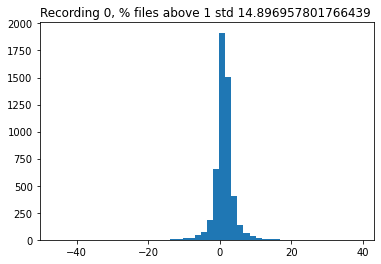

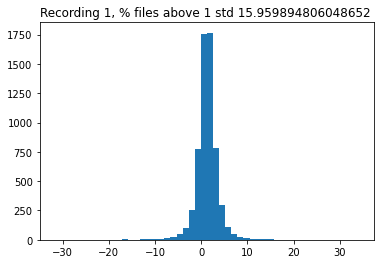

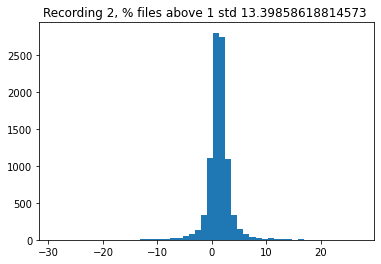

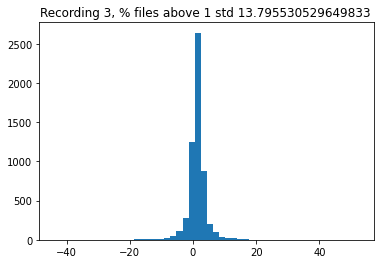

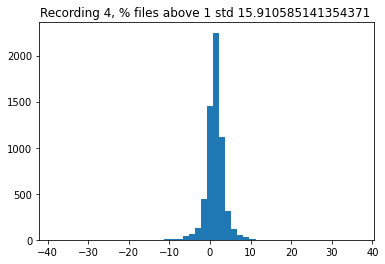

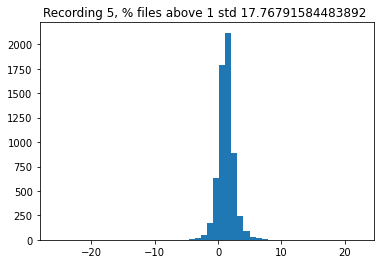

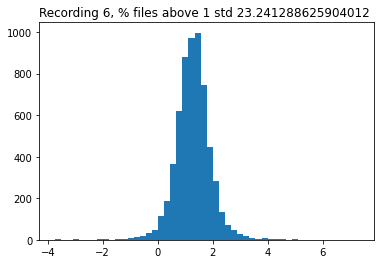

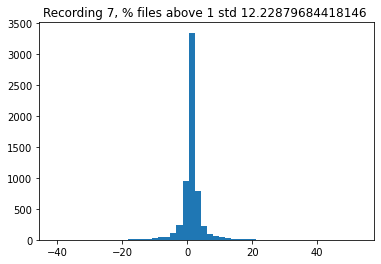

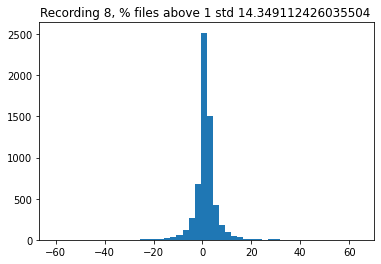

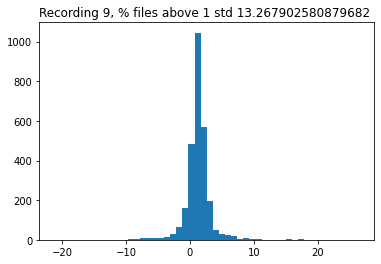

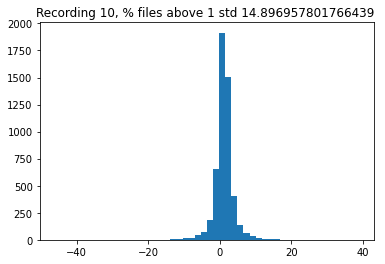

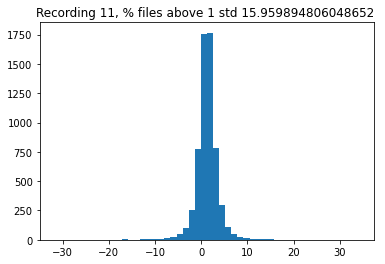

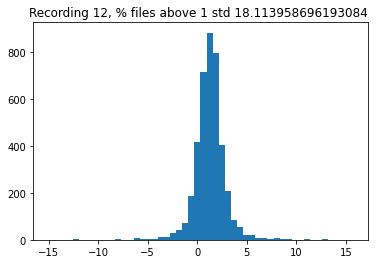

In [130]:
for i in range(13):
    m.append(plot_audio_info([f for f in filenames if f"{i}_"==f[:len(f"{i}_")]]))
    plt.hist(m[i], bins=50)
    plt.title(f"Recording {i}, % files above 1 std {sum(np.abs(m[i] - np.mean(m[i]))>(1*np.std(m[i])))/len(m[i]) * 100} ")
    plt.show()

In [13]:
def get_non_silent_segments(filenames, factor=1.5):
    mean_segment= []
    for fil in tqdm(filenames):
        f, x = wavfile.read(os.path.join('/media/aneesh/USB1000/Zurich_Urban_Sounds/TASCAM_RECORDER/audio_segments',fil))
        mean_segment.append(np.mean(x))
    mean_segment = np.array(mean_segment)
    mean = np.mean(mean_segment)
    std_dev = np.std(mean_segment)
    non_silent_file_index = np.argwhere(np.abs(mean_segment - mean)>(factor*std_dev))
    return np.array(filenames)[non_silent_file_index]  

In [27]:
i= 12
A = get_non_silent_segments([f for f in filenames if f"{i}_"==f[:len(f"{i}_")]])

KeyboardInterrupt: 

# i='10'
[f for f in filenames if f"{i}_"==f[:len(f"{i}_")]]

In [136]:
import random

In [257]:
# randomly sample significant files.
i=7
num_samples =10
recordings = [f for f in filenames if f"{i}_" in f]
significant_index = np.argwhere(np.abs(m[i] - np.mean(m[i]))>(2.5*np.std(m[i])))
rand_idx = significant_index[random.sample(range(len(significant_index)), num_samples)]
random_recordings = np.array(recordings)[rand_idx.reshape(-1)]

In [258]:
len(significant_index)

213

In [261]:
ipd.Audio(os.path.join('/media/aneesh/USB1000/Zurich_Urban_Sounds/TASCAM_RECORDER/audio_segments',
                       random_recordings[7]))
print(random_recordings[7])

7_000003401.wav


In [202]:

import noisereduce as nr

/home/aneesh/python_environments/python_sound/lib/python3.6/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [262]:
# f,noisy_part = wavfile.read(os.path.join('/media/aneesh/USB1000/Zurich_Urban_Sounds/TASCAM_RECORDER/audio_segments/','6_000002677.wav'))
f, data =  wavfile.read(os.path.join('/media/aneesh/USB1000/Zurich_Urban_Sounds/TASCAM_RECORDER/audio_segments/','7_000003401.wav'))
# perform noise reduction
reduced_noise = nr.reduce_noise(audio_clip=data.astype('float'), noise_clip=noisy_part.astype('float'), verbose=False)

# Removing noisy part for effective silence calculation.

Draw a sample for the noise which is present in all the recordings. Use this as a mask to remove from all audio segments.
It is know from previous analysis of the distribution of means of all the audio segments. They all follow almost a normal distribution. Since we know most of the recordings/samples are silent noise, lets remove them by forming a mask out of default noise.

In [272]:
i = 7
files = [f for f in filenames if f"{i}_"==f[:len(f"{i}_")]]
mean = plot_audio_info(files)

In [271]:
reduced_noise

array([ -623.15272938,  -598.84733094,  -602.16139541, ...,
       -1306.57130032, -1389.15508197, -1313.8526345 ])

In [231]:
ipd.Audio(reduced_noise, rate=f)

In [253]:
np.median(mean)

1.2755723110465116

In [250]:
np.median(var)

180922.68926121423

In [252]:
np.min(var)

12008.268455694115

In [264]:
new_noise = np.random.normal(loc = np.median(mean), scale = np.median(var),size=len(noisy_part))

In [265]:
f, data =  wavfile.read(os.path.join('/media/aneesh/USB1000/Zurich_Urban_Sounds/TASCAM_RECORDER/audio_segments/','7_000003401.wav'))
# perform noise reduction
reduced_noise = nr.reduce_noise(audio_clip=data.astype('float'), noise_clip=new_noise.astype('float'), verbose=False)

In [266]:
ipd.Audio(reduced_noise, rate=f)

In [274]:
ipd.Audio(noisy_part, rate=f)

In [273]:
reduced_noise = nr.reduce_noise(audio_clip=noisy_part.astype('float'), noise_clip=noisy_part.astype('float'), verbose=False)
ipd.Audio(reduced_noise, rate=f)

## Seperating silence using k-means


In [7]:
temp = np.load(os.path.join('/media/aneesh/USB1000/Zurich_Urban_Sounds/TASCAM_RECORDER/features/','7_000003401.npy'))

(36, 5, 1)